In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [14]:
# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# (60000, 28, 28) → (60000, 28, 28, 1), (10000, 28, 28) → (10000, 28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images  = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\leehy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [18]:
# 4) 학습 (history에 손실/정확도 기록)
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    batch_size=64
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 104ms/step - accuracy: 0.8590 - loss: 0.4355 - val_accuracy: 0.9833 - val_loss: 0.0529
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 137s 98ms/step - accuracy: 0.9821 - loss: 0.0562 - val_accuracy: 0.9863 - val_loss: 0.0402
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 96ms/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 0.9887 - val_loss: 0.0352
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 123s 76ms/step - accuracy: 0.9906 - loss: 0.0286 - val_accuracy: 0.9859 - val_loss: 0.0460
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9905 - val_loss: 0.0337


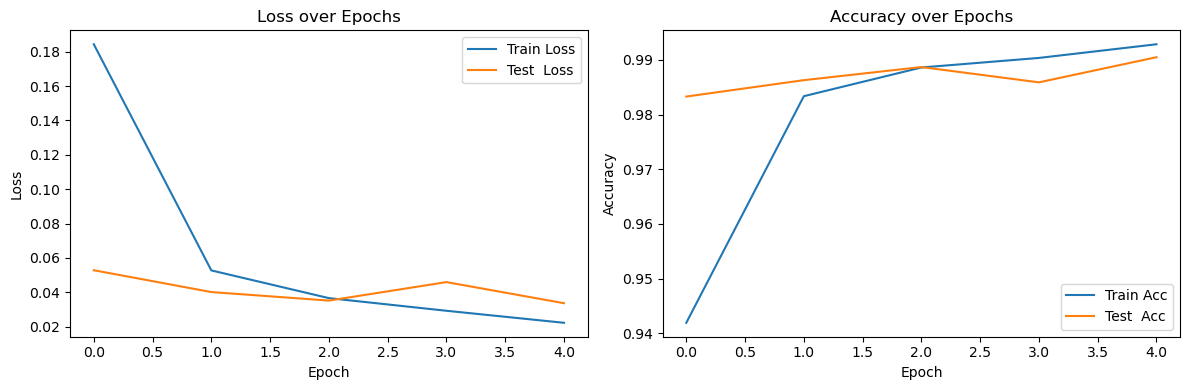

In [19]:
# 5) 학습 결과 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'],    label='Train Loss')
plt.plot(history.history['val_loss'],label='Test  Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'],     label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test  Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# 6) 테스트셋 최종 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss:     0.0337
Test Accuracy: 0.9905



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



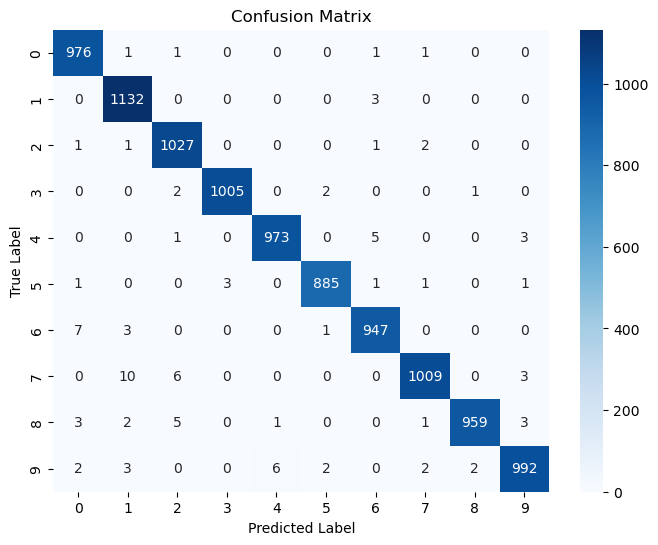

In [21]:
# 7) 분류 리포트 & 혼동행렬
# 예측 확률 → 레이블
pred_probs  = model.predict(test_images, verbose=0)
pred_labels = np.argmax(pred_probs, axis=1)

print("\n=== Classification Report ===")
print(classification_report(test_labels, pred_labels))

# 혼동행렬 그리기
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()